In [36]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

In [37]:
class Search:
    def __init__(self, sequence_length=2):
        self.sequence_length = sequence_length
        self.solution = [random.randint(0, 1) for _ in range(sequence_length)]
        self.fitness_data = []

    def solve_by_random_pattern(self):
        attempts = 0
        start_time = time.time()
        while True:
            pattern = [random.randint(0, 1) for _ in range(self.sequence_length)]
            self.fitness_data.append(self.fitness(pattern.copy()))
            attempts += 1
            if pattern == self.solution:
                time_duration = time.time() - start_time
                return attempts, time_duration

    def fitness(self, guessed_pattern):
        # Calculate the Hamming distance
        distance = sum(bit1 != bit2 for bit1, bit2 in zip(guessed_pattern, self.solution))
        
        # Calculate fitness as the inverse of the distance
        max_fitness = len(self.solution)  # Maximum fitness when patterns match
        fitness_value = max_fitness - distance
        
        return fitness_value
    
    def mutate_pattern(self):
        for _ in range(1000):  # Limit the number of mutations to 1000
            # Randomly select a bit to flip
            index_to_mutate = random.randint(0, self.sequence_length - 1)

            # Make a copy of the current pattern to modify
            new_pattern = self.solution[:]

            # Flip the selected bit
            new_pattern[index_to_mutate] = 1 - new_pattern[index_to_mutate]

            # Calculate the fitness of the new pattern
            new_fitness = self.fitness(new_pattern)

            if new_fitness > self.fitness(self.solution):
                self.solution = new_pattern  # Accept the mutation if it's better
                if self.solution == new_pattern:
                    break  # Stop if the pattern is equal to the solution

    def cross_over(self, parent1, parent2):
        child = []
        for i in range(self.sequence_length):
            if random.random() < 0.5:
                child.append(parent1[i])
            else:
                child.append(parent2[i])
        return child

    def mutate(self, pattern, mutation_rate=0.1):
        for i in range(len(pattern)):
            if random.random() < mutation_rate:
                pattern[i] = 1 - pattern[i]
        return pattern

    def generate_set_of_patterns(self, number_of_patterns=100):
        patterns = []
        for _ in range(number_of_patterns):
            pattern = [random.randint(0, 1) for _ in range(self.sequence_length)]
            patterns.append(pattern.copy())
        
        return patterns

    def evolve_population(self, current_population, mut_flag, mutation_rate=0.1 ):
        # Sort patterns based on fitness
        sorted_patterns = sorted(current_population, key= lambda pattern: self.fitness(pattern), reverse= True)
        
        # Calculate the number of patterns to select (top 30%)
        num_patterns_to_select = int(len(sorted_patterns) * 0.3)
        
        # Select the top 30% of patterns
        selected_patterns = sorted_patterns[:num_patterns_to_select]

        # Generate the remaining 70% through mutation
        num_patterns_to_mutate = len(sorted_patterns) - num_patterns_to_select
        # Mutate the selected patterns
        if mut_flag:
            for _ in range(num_patterns_to_mutate):
                selected_patterns.append(self.mutate(sorted_patterns[random.randint(0, num_patterns_to_select - 1)].copy(), mutation_rate))
        else:
            for _ in range(num_patterns_to_mutate):
                selected_patterns.append(self.cross_over(sorted_patterns[random.randint(0, num_patterns_to_select - 1)], sorted_patterns[random.randint(0, num_patterns_to_select - 1)]))
        return selected_patterns

    # Create a function to evaluate and evolve populations
    def evaluate_and_evolve_population(self, trials, max_generations, mut_flag = True):
        attempts_data = []
        times_data = []
        fitness_data = []

        for _ in range(trials):
            start_time = time.time()  # Start the timer

            current_population = self.generate_set_of_patterns()
            mutation_rate = 0.1
            best_fitness = -1  # Track the best fitness

            for generation in range(max_generations):
                current_population = self.evolve_population(current_population, mutation_rate, mut_flag)
                best_pattern = current_population[0]
                current_fitness = self.fitness(best_pattern)

                # Check if fitness stagnates
                if current_fitness == best_fitness:
                    break
                best_fitness = current_fitness

            end_time = time.time()  # Stop the timer
            time_duration = end_time - start_time  # Calculate the duration

            attempts_data.append(len(current_population))
            times_data.append(time_duration)
            fitness_data.append(best_fitness)

        return attempts_data, times_data, fitness_data




In [38]:


def create_box_plots(bit_counts, attempts_results, times_results, fitness_results):
    fig, ax = plt.subplots(3, 1, figsize=(10, 9))

    for bit_count in bit_counts:
        ax[0].boxplot(attempts_results[bit_count], positions=[bit_count], showfliers=False)
        ax[1].boxplot(times_results[bit_count], positions=[bit_count], showfliers=False)
        ax[2].boxplot(fitness_results[bit_count], positions=[bit_count], showfliers=False)

    ax[0].set_title("Attempts vs. Number of Bits")
    ax[0].set_xlabel("Number of Bits")
    ax[0].set_ylabel("Attempts")

    ax[1].set_title("Time vs. Number of Bits")
    ax[1].set_xlabel("Number of Bits")
    ax[1].set_ylabel("Time (seconds)")

    ax[2].set_title("Fitness vs. Number of Bits")
    ax[2].set_xlabel("Number of Bits")
    ax[2].set_ylabel("Fitness")

    plt.tight_layout()
    plt.show()



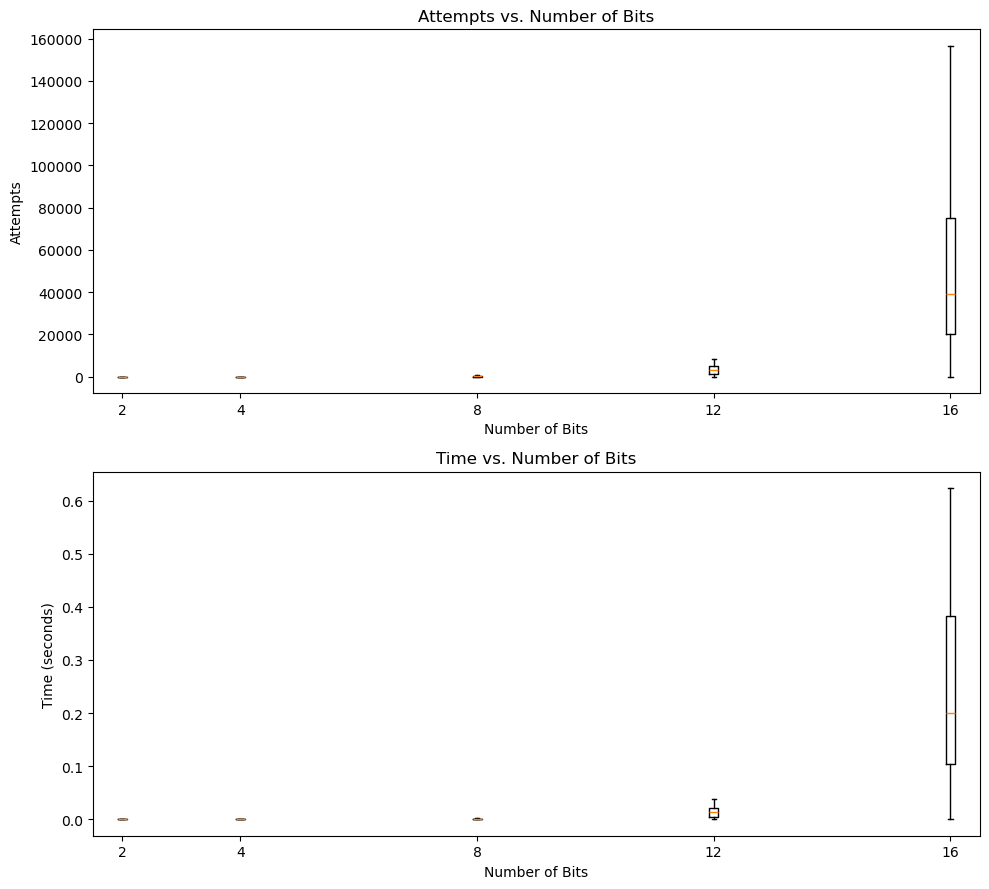

In [39]:
if __name__ == "__main__":
    random.seed(2137)

    bit_counts = [2, 4, 8, 12, 16]
    trials_amount = 30
    attempts_data = {bit_count: [] for bit_count in bit_counts}
    times_data = {bit_count: [] for bit_count in bit_counts}
    fitness_data = {bit_count: [] for bit_count in bit_counts}

    for _ in range(trials_amount):
        for bit in bit_counts:
            pattern = Search(sequence_length= bit)
            pattern.mutate_pattern()
            attempts, time_duration = pattern.solve_by_random_pattern()
            attempts_data[bit].append(attempts)
            times_data[bit].append(time_duration)
            fitness_data[bit].append(pattern.fitness(pattern.fitness_data))

    # Create box plots for attempts, times, and fitness
    fig, ax = plt.subplots(2, 1, figsize=(10, 9))
    
    for bit in bit_counts:
        ax[0].boxplot(attempts_data[bit], positions=[bit], showfliers=False)
        ax[1].boxplot(times_data[bit], positions=[bit], showfliers=False)

    ax[0].set_title("Attempts vs. Number of Bits")
    ax[0].set_xlabel("Number of Bits")
    ax[0].set_ylabel("Attempts")

    ax[1].set_title("Time vs. Number of Bits")
    ax[1].set_xlabel("Number of Bits")
    ax[1].set_ylabel("Time (seconds)")


    plt.tight_layout()
    plt.show()

The code as written does not guarantee convergence to the solution, and the success of generating better patterns with a single mutation depends on the problem's characteristics and the specific genetic algorithm parameters.

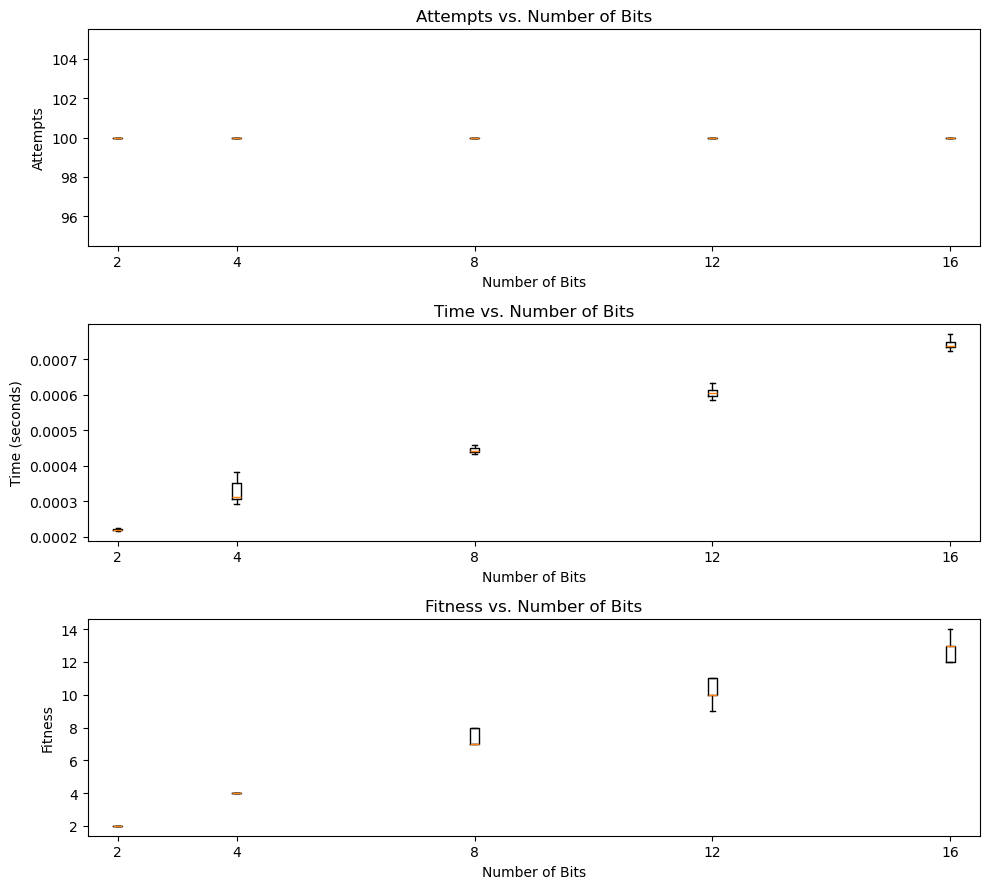

In [40]:
# Exercise 2

attempts_results = {bit_count: [] for bit_count in bit_counts}
times_results = {bit_count: [] for bit_count in bit_counts}
fitness_results = {bit_count: [] for bit_count in bit_counts}

attempts_results_ex3 = {bit_count: [] for bit_count in bit_counts}
times_results_ex3 = {bit_count: [] for bit_count in bit_counts}
fitness_results_ex3 = {bit_count: [] for bit_count in bit_counts}

for bit_count in bit_counts:
    pattern_mutate = Search(sequence_length= bit_count)
    pattern_evolve = Search(sequence_length= bit_count)

    attempts_data, times_data, fitness_data = pattern_mutate.evaluate_and_evolve_population(trials_amount, max_generations=100, mut_flag= True)
    attempts_data_ex3, times_data_ex3, fitness_data_ex3 = pattern_evolve.evaluate_and_evolve_population(trials_amount, max_generations=100, mut_flag= False)

    attempts_results[bit_count].extend(attempts_data)
    times_results[bit_count].extend(times_data)
    fitness_results[bit_count].extend(fitness_data)

    attempts_results_ex3[bit_count].extend(attempts_data_ex3)
    times_results_ex3[bit_count].extend(times_data_ex3)
    fitness_results_ex3[bit_count].extend(fitness_data_ex3)

# Create box plots for attempts, times, and fitness
create_box_plots(bit_counts, attempts_results, times_results, fitness_results)



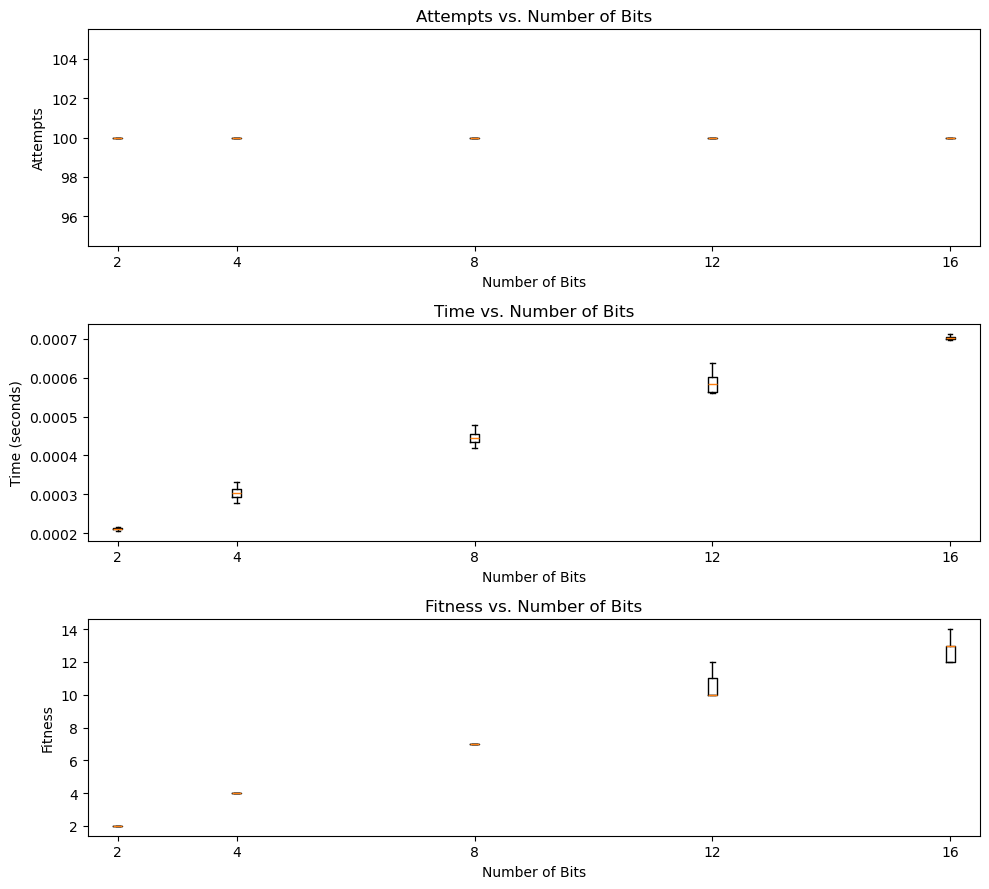

In [41]:
create_box_plots(bit_counts, attempts_results_ex3, times_results_ex3, fitness_results_ex3)

Results for Exercise 3 - Using CrossOver instead of Mutation